## Temperature Device Failure

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

# import Machine Learning
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

#metrics for model perfomance
from sklearn import metrics
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing data from Google Drive

In [ ]:
#Importing Data with Pandas
df=pd.read_csv('drive/My Drive/Pace University/temperature_device_failure.csv')
df

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [ ]:
#1.2 Check the datatype
df.dtypes

timestamp     object
value        float64
dtype: object

In [ ]:
#1.1 Look for missing, null, NaN records
df.isnull()

,timestamp,value
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7262,False,False
7263,False,False
7264,False,False
7265,False,False


In [ ]:
#1.1 Determine if ANY Value in a Series is Missing
df.isnull().values.any()

False

In [ ]:
#1.1 how many missing values
df.isnull().sum()

timestamp    0
value        0
dtype: int64

#1) Plot / visualize the 'original' dataset 

In [ ]:
from matplotlib import pyplot


In [ ]:
# Changing the type of timestamp from object to datetime 64
from datetime import datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

# return the date

df

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [ ]:
#timestamp column has datetime type
df.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

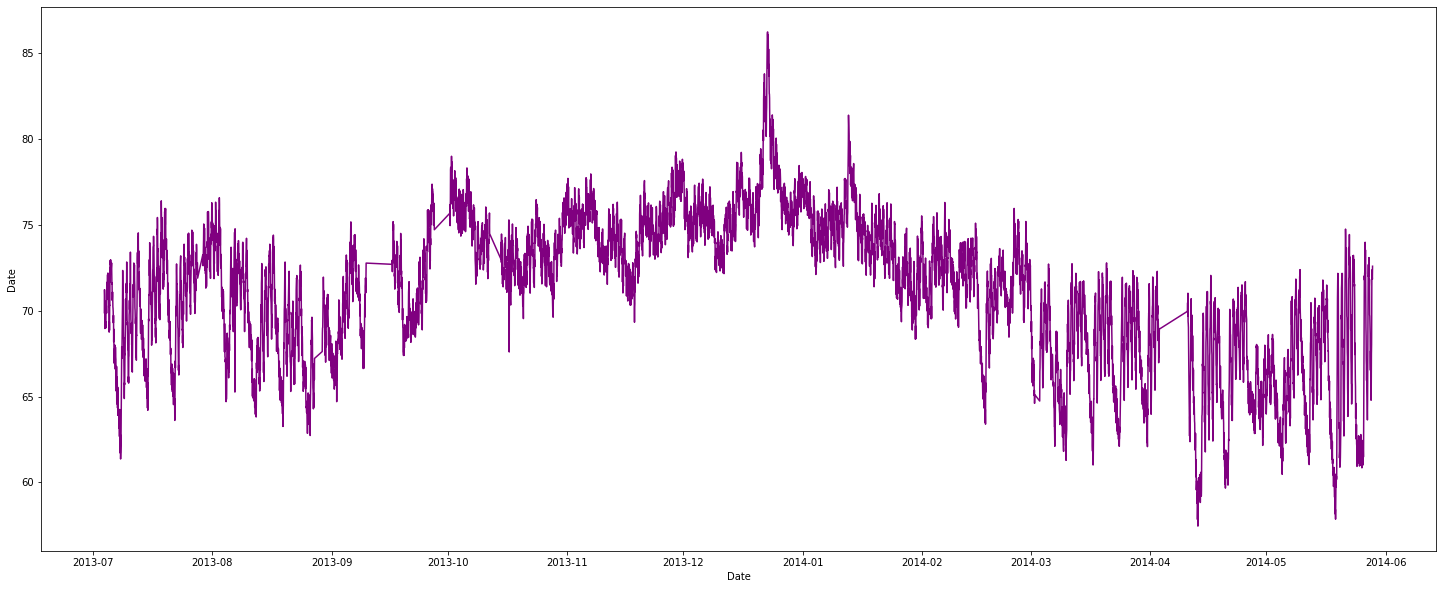

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 10))

# Add x-axis and y-axis
ax.plot(
        df['timestamp'],
        df['value'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Date",
       title="")

plt.show()

# As we can notice from the plot, it has low temperature during warm seasons and high temperature during cold seasons. I believe that that the data belongs to the continent, which is located in the southernmost parts of our planet.

#2) Feature Engineering 'dtcat' (date-time-category):
- Weekday Day
- Weekday Night
- Weekend Day
- Weekend Night

In [ ]:
df1=df.copy()

In [ ]:
#Taking days of MONTH from Dataframe
#Taking days of WEEK from Dataframe
#Taking Name of days of WEEK from Dataframe
#Taking exact time and hours from Dataframe


df1['year']=df1['timestamp'].dt.year
df1['month']=df1['timestamp'].dt.month
df1['day']=df1['timestamp'].dt.day
df1['day_of_week']=df1['timestamp'].dt.dayofweek
df1['day_name']=df1['timestamp'].dt.day_name()
df1['time']=df1['timestamp'].dt.time
df1['hour']=df1['timestamp'].dt.hour

df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour
0,2013-07-04 00:00:00,69.880835,2013,7,4,3,Thursday,00:00:00,0
1,2013-07-04 01:00:00,71.220227,2013,7,4,3,Thursday,01:00:00,1
2,2013-07-04 02:00:00,70.877805,2013,7,4,3,Thursday,02:00:00,2
3,2013-07-04 03:00:00,68.959400,2013,7,4,3,Thursday,03:00:00,3
4,2013-07-04 04:00:00,69.283551,2013,7,4,3,Thursday,04:00:00,4
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,28,2,Wednesday,11:00:00,11
7263,2014-05-28 12:00:00,72.172956,2014,5,28,2,Wednesday,12:00:00,12
7264,2014-05-28 13:00:00,72.046565,2014,5,28,2,Wednesday,13:00:00,13
7265,2014-05-28 14:00:00,71.825226,2014,5,28,2,Wednesday,14:00:00,14


In [ ]:
# Now we define column 'day' 0=Night and 1=Day

df1['day']=((df1['hour']>=7) & (df1['hour']<=19)).astype(int)

# We define column 'WeekDay' 0=Weekedn ,1=Weekday

df1['WeekDay']=(df1['day_of_week']<5).astype(int)

# dcat 0=Weekend Night, 1=Weekend Day, 2= Weekday Night, 3=Weekday Day

df1['dtcat']=df1['WeekDay']*2+df1['day']
df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,1,2,Wednesday,11:00:00,11,1,3
7263,2014-05-28 12:00:00,72.172956,2014,5,1,2,Wednesday,12:00:00,12,1,3
7264,2014-05-28 13:00:00,72.046565,2014,5,1,2,Wednesday,13:00:00,13,1,3
7265,2014-05-28 14:00:00,71.825226,2014,5,1,2,Wednesday,14:00:00,14,1,3


In [ ]:
df1[:50]

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2
5,2013-07-04 05:00:00,70.060966,2013,7,0,3,Thursday,05:00:00,5,1,2
6,2013-07-04 06:00:00,69.279765,2013,7,0,3,Thursday,06:00:00,6,1,2
7,2013-07-04 07:00:00,69.369608,2013,7,1,3,Thursday,07:00:00,7,1,3
8,2013-07-04 08:00:00,69.166714,2013,7,1,3,Thursday,08:00:00,8,1,3
9,2013-07-04 09:00:00,68.986083,2013,7,1,3,Thursday,09:00:00,9,1,3


As can be seen from our data 0=Weekend Night, 1=Weekend Day, 2= Weekday Night, 3=Weekday Day

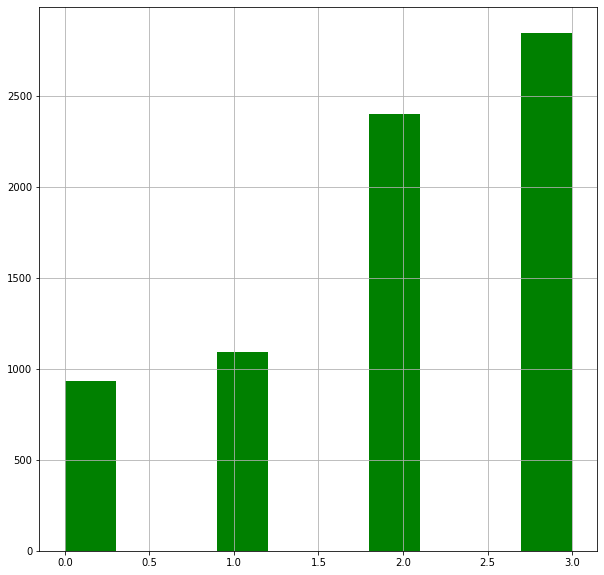

In [ ]:
# Building histogram for dtcat
colors = ['green']
df1['dtcat'].hist(figsize = (10, 10))
plt.hist(df1['dtcat'], color=colors)

plt.show()


In [ ]:
print(df1['dtcat'].value_counts())

3    2843
2    2400
1    1092
0     932
Name: dtcat, dtype: int64


In [ ]:
df2=df1.copy()


II. Define the Feature Variable ‘X’, and the Label/Target variable ‘y’.

In [ ]:

df2['day']=df['timestamp'].dt.day
y=df2['value']
x=df2.drop(columns=['value','WeekDay','day_name','time','timestamp'])

In [ ]:
x

,year,month,day,day_of_week,hour,dtcat
0,2013,7,4,3,0,2
1,2013,7,4,3,1,2
2,2013,7,4,3,2,2
3,2013,7,4,3,3,2
4,2013,7,4,3,4,2
...,...,...,...,...,...,...
7262,2014,5,28,2,11,3
7263,2014,5,28,2,12,3
7264,2014,5,28,2,13,3
7265,2014,5,28,2,14,3


In [ ]:
y

0       69.880835
1       71.220227
2       70.877805
3       68.959400
4       69.283551
          ...    
7262    72.370206
7263    72.172956
7264    72.046565
7265    71.825226
7266    72.584089
Name: value, Length: 7267, dtype: float64

#3)  K-Means algorithm 

In [ ]:
from sklearn.cluster import KMeans
K = range(1, 20)
kn = [] 
for k in K: 
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    kn.append(kmeans.inertia_)
    centroids=kmeans.cluster_centers_

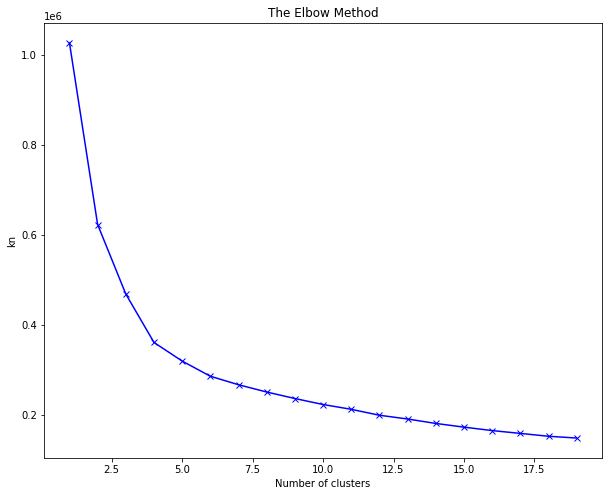

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 20), kn, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('kn')
plt.title('The Elbow Method') 
plt.show()

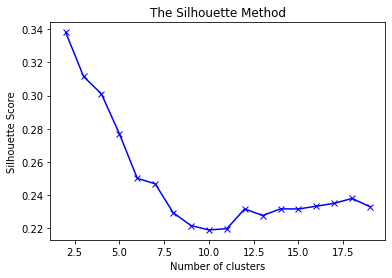

In [ ]:
from sklearn.metrics import silhouette_score
silhouettes_list= []
for i in range(2,20):
    kmean = KMeans(n_clusters = i, random_state = 42)
    kmean.fit(x)
    cluster_labels = kmean.labels_
    silhouettes_list.append(silhouette_score(x,cluster_labels))

plt.plot(range(2, 20), silhouettes_list, 'bx-')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

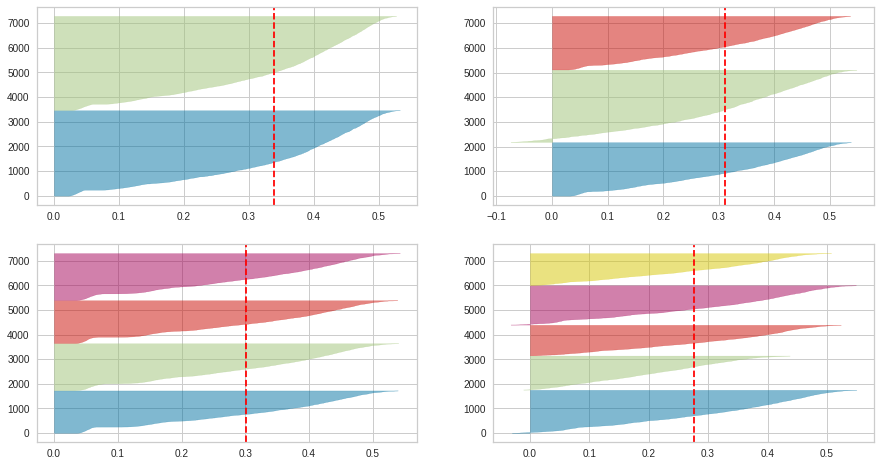

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

# PCA

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
princ = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.52675087 0.33958812]


In [ ]:
pcd = pd.DataFrame( princ
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pcd

,principal component 1,principal component 2
0,-11.725908,11.595708
1,-11.733566,10.595907
2,-11.741225,9.596106
3,-11.748884,8.596305
4,-11.756543,7.596504
...,...,...
7262,12.204186,0.396234
7263,12.196527,-0.603567
7264,12.188868,-1.603369
7265,12.181210,-2.603170


In [ ]:
fDf = pd.concat([pcd, df2[['dtcat']]], axis = 1)
fDf

,principal component 1,principal component 2,dtcat
0,-11.725908,11.595708,2
1,-11.733566,10.595907,2
2,-11.741225,9.596106,2
3,-11.748884,8.596305,2
4,-11.756543,7.596504,2
...,...,...,...
7262,12.204186,0.396234,3
7263,12.196527,-0.603567,3
7264,12.188868,-1.603369,3
7265,12.181210,-2.603170,3


In [ ]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(pcd)
labels=km.predict(pcd)
centroids=km.cluster_centers_

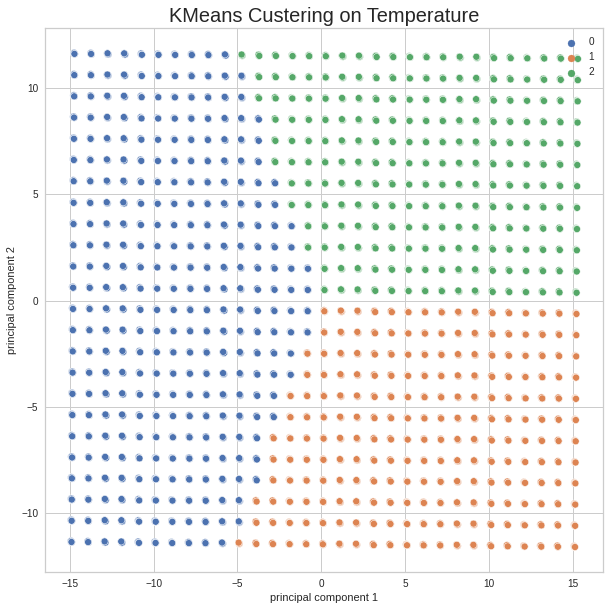

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pcd,x=pcd.iloc[:,0],y=pcd.iloc[:,1],hue=labels,palette='deep');
plt.title('KMeans Custering on Temperature',size=20)
plt.show()

#All following steps should be executed twice:


# -for outliers_fraction = 0.01 (1%), assume that someone gave us this figure
# - calculate outliers_fraction by finding the total number of outliers utilizing the IQR Method; specifically use the 1.5xIQR rule.


## IQR

In [ ]:
df1.value.describe()

count    7267.000000
mean       71.242433
std         4.247509
min        57.458406
25%        68.369411
50%        71.858493
75%        74.430958
max        86.223213
Name: value, dtype: float64

In [ ]:
#Inter-Quartile Range

Q1= np.percentile(df1['value'],25)

Q2=np.percentile(df1['value'],50)

Q3= np.percentile(df1['value'],75)

print(Q1)
print(Q2)
print(Q3)

68.36941051
71.85849263
74.43095786


In [ ]:

IQR=Q3-Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

print('lower range: ', lower_range)
print('upper range: ', upper_range)
print('.    IQR=',IQR)


lower range:  59.277089484999976
upper range:  83.52327888500002
.    IQR= 6.061547350000012


In [ ]:
outliers=[]
for n in df.index:
  if df.loc[n,'value']<lower_range: 
    outliers.append(1)
  elif df.loc[n,'value']>upper_range:
    outliers.append(1)
  else:
    outliers.append(0)

  

In [ ]:
fract=sum(outliers)/len(df)
print(sum(outliers))
fract

35


0.004816292830604101

# Elliptic Envelope FRACTION=0.01 

In [ ]:
from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.01)
out= elpenv.fit_predict(df1[['value']])

In [ ]:

pd.DataFrame(out).value_counts()

 1    7194
-1      73
dtype: int64

In [ ]:
df1['elpenv_score']=elpenv.decision_function(df1[['value']])

df1['outlier1']=elpenv.predict(df1[['value']])
df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat,elpenv_score,outlier1
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2,9.571927,1
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2,9.814768,1
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2,9.778707,1
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2,9.246070,1
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2,9.375461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,1,2,Wednesday,11:00:00,11,1,3,9.805053,1
7263,2014-05-28 12:00:00,72.172956,2014,5,1,2,Wednesday,12:00:00,12,1,3,9.821045,1
7264,2014-05-28 13:00:00,72.046565,2014,5,1,2,Wednesday,13:00:00,13,1,3,9.828173,1
7265,2014-05-28 14:00:00,71.825226,2014,5,1,2,Wednesday,14:00:00,14,1,3,9.834790,1


In [ ]:
df1['outlier1'].value_counts()

 1    7194
-1      73
Name: outlier1, dtype: int64

In [ ]:
count=len(df1[df1['value']>74.8])
accuracy=100*list(df1['outlier1']).count(-1)/count
print('Accuracy of IF for 0.01 is',accuracy)

Accuracy of IF for 0.01 is 4.629042485732404


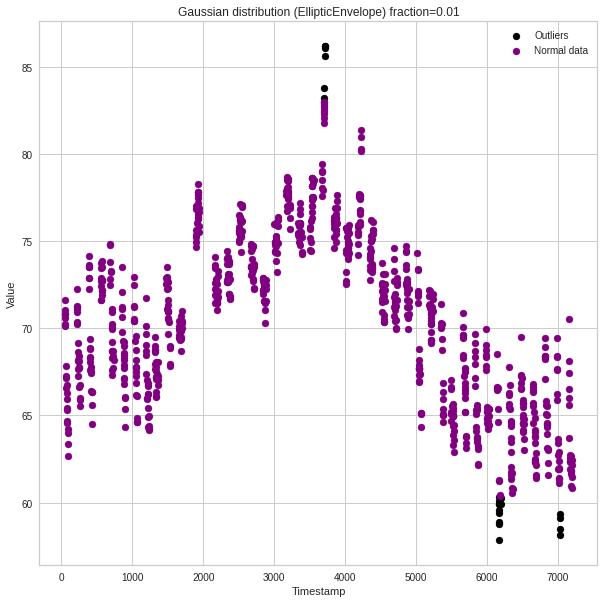

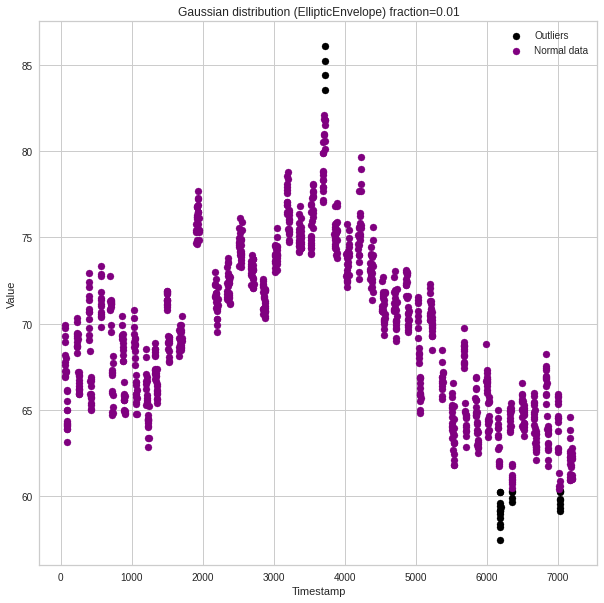

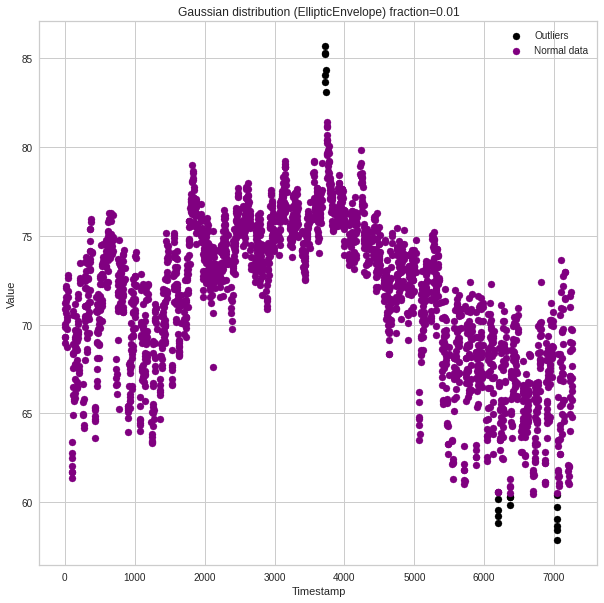

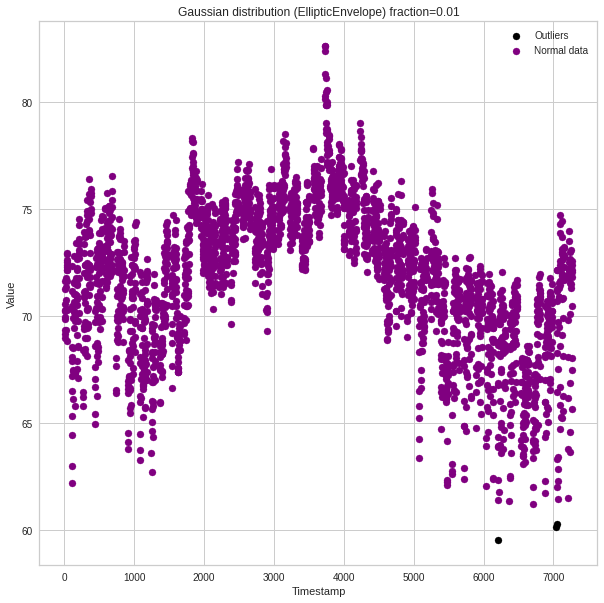

In [ ]:
for i in range(0,4):

    plt.figure(figsize=(10,10))
    plt.scatter(df1[(df1['dtcat'] == i) & (out  == -1)].index, df1[(df1['dtcat'] == i) & (out  == -1)]['value'], c = 'black', label = 'Outliers')
    plt.scatter(df1[(df1['dtcat'] == i) & (out  == 1)].index, df1[(df1['dtcat'] == i) & (out  == 1)]['value'], c = 'purple', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Gaussian distribution (EllipticEnvelope) fraction=0.01')
    plt.legend()
    plt.show()

# Isolation Forest FRACTION=0.01

In [ ]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest(contamination=0.01)
fore = forest.fit_predict(df1[['value']])
fore

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.DataFrame(fore).value_counts()

 1    7194
-1      73
dtype: int64

In [ ]:
df1['forest_score']=forest.decision_function(df1[['value']])

df1['outlier']=forest.predict(df1[['value']])
df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat,elpenv_score,outlier1,forest_score,outlier
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2,9.571927,1,0.266138,1
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2,9.814768,1,0.292610,1
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2,9.778707,1,0.288468,1
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2,9.246070,1,0.263201,1
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2,9.375461,1,0.256256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,1,2,Wednesday,11:00:00,11,1,3,9.805053,1,0.293851,1
7263,2014-05-28 12:00:00,72.172956,2014,5,1,2,Wednesday,12:00:00,12,1,3,9.821045,1,0.295301,1
7264,2014-05-28 13:00:00,72.046565,2014,5,1,2,Wednesday,13:00:00,13,1,3,9.828173,1,0.298561,1
7265,2014-05-28 14:00:00,71.825226,2014,5,1,2,Wednesday,14:00:00,14,1,3,9.834790,1,0.290309,1


In [ ]:
df1.groupby('outlier').size()

outlier
-1      73
 1    7194
dtype: int64

In [ ]:
count=len(df1[df1['value']>74.5])
accuracy=100*list(df1['outlier']).count(-1)/(count)
print('Accuracy of IF for 0.01 is',accuracy)

Accuracy of IF for 0.01 is 4.13129598189021


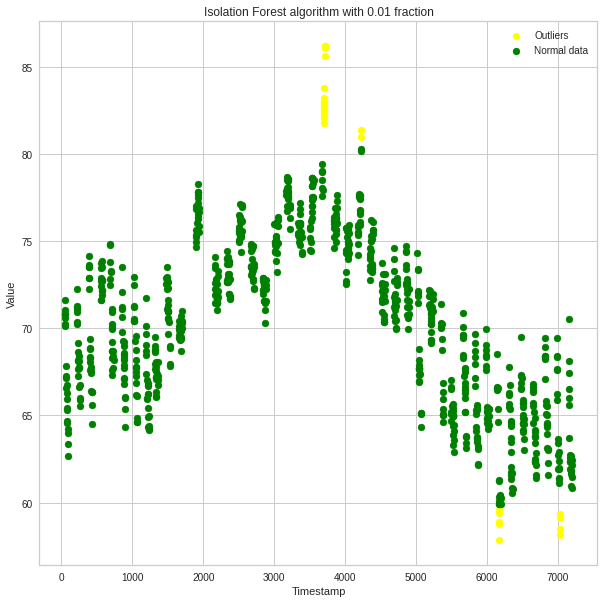

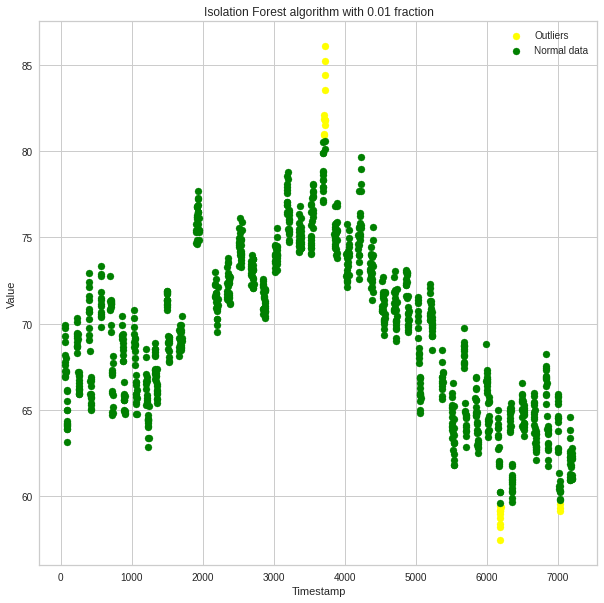

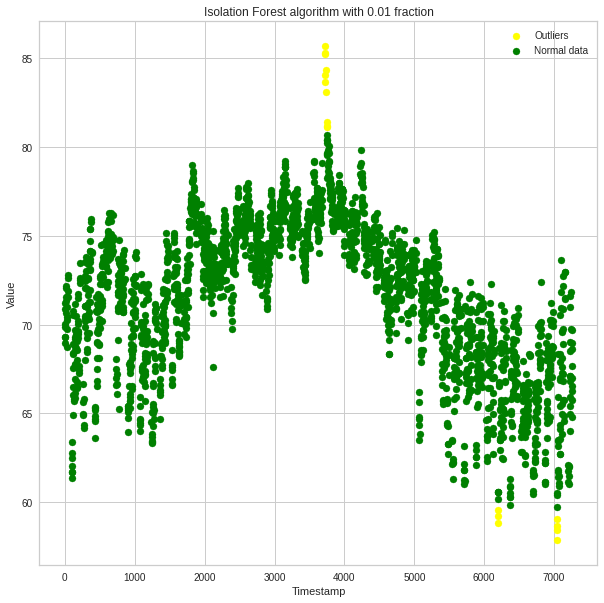

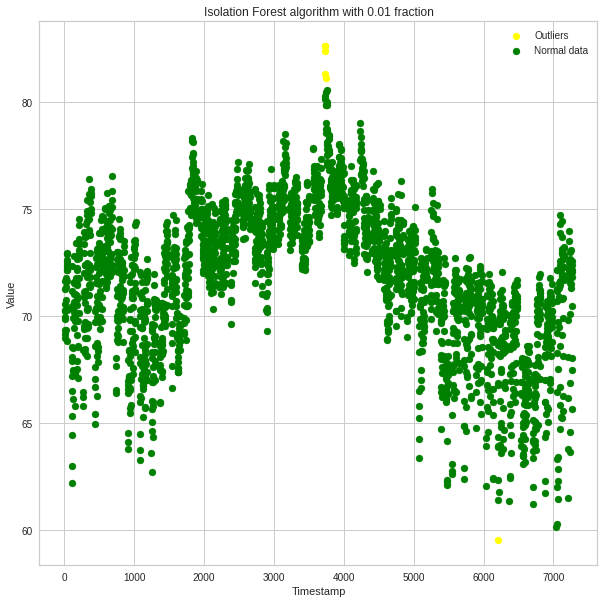

In [ ]:
# Plot
for i in range(0,4):
    plt.figure(figsize=(10,10))
    plt.scatter(df1[(df1['dtcat'] == i) & (fore  == -1)].index, df1[(df1['dtcat'] == i) & (fore  == -1)]['value'], c = 'yellow', label = 'Outliers')
    plt.scatter(df1[(df1['dtcat'] == i) & (fore  == 1)].index, df1[(df1['dtcat'] == i) & (fore  == 1)]['value'], c = 'green', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Isolation Forest algorithm with 0.01 fraction')
    plt.legend()
    plt.show()

# Elliptic Envelope FRACTION=0.0048

In [ ]:
from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.0048)
outq = elpenv.fit_predict(df[['value']])


In [ ]:
pd.DataFrame(outq).value_counts()

 1    7232
-1      35
dtype: int64

In [ ]:
y.describe()

count    7267.000000
mean       71.242433
std         4.247509
min        57.458406
25%        68.369411
50%        71.858493
75%        74.430958
max        86.223213
Name: value, dtype: float64

In [ ]:
df1['elpenv_score1']=elpenv.decision_function(df1[['value']])

df1['outlier2']=elpenv.predict(df1[['value']])
df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat,elpenv_score,outlier1,forest_score,outlier,elpenv_score1,outlier2
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2,9.571927,1,0.266138,1,11.361329,1
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2,9.814768,1,0.292610,1,11.604170,1
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2,9.778707,1,0.288468,1,11.568109,1
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2,9.246070,1,0.263201,1,11.035472,1
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2,9.375461,1,0.256256,1,11.164863,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,1,2,Wednesday,11:00:00,11,1,3,9.805053,1,0.293851,1,11.594456,1
7263,2014-05-28 12:00:00,72.172956,2014,5,1,2,Wednesday,12:00:00,12,1,3,9.821045,1,0.295301,1,11.610447,1
7264,2014-05-28 13:00:00,72.046565,2014,5,1,2,Wednesday,13:00:00,13,1,3,9.828173,1,0.298561,1,11.617575,1
7265,2014-05-28 14:00:00,71.825226,2014,5,1,2,Wednesday,14:00:00,14,1,3,9.834790,1,0.290309,1,11.624192,1


In [ ]:
df1.groupby('outlier2').size()

outlier2
-1      35
 1    7232
dtype: int64

In [ ]:
count=len(df1[df1['value']>74.8])
accuracy=100*list(df1['outlier2']).count(-1)/count
print('Accuracy of IF for 0.01 is',accuracy)

Accuracy of IF for 0.01 is 2.2194039315155356


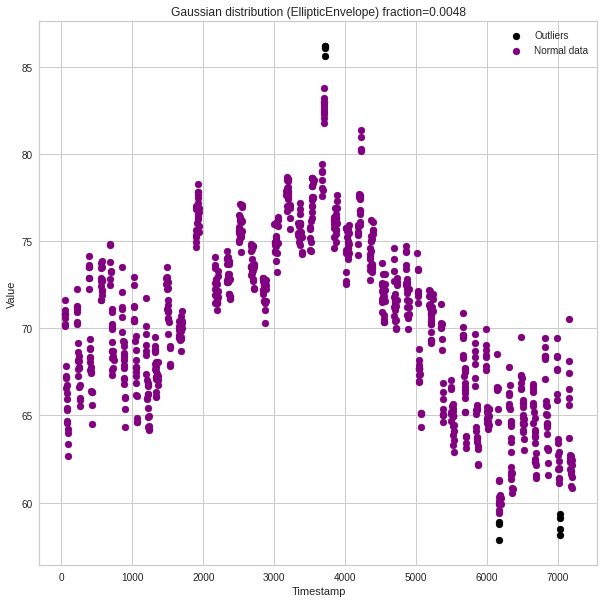

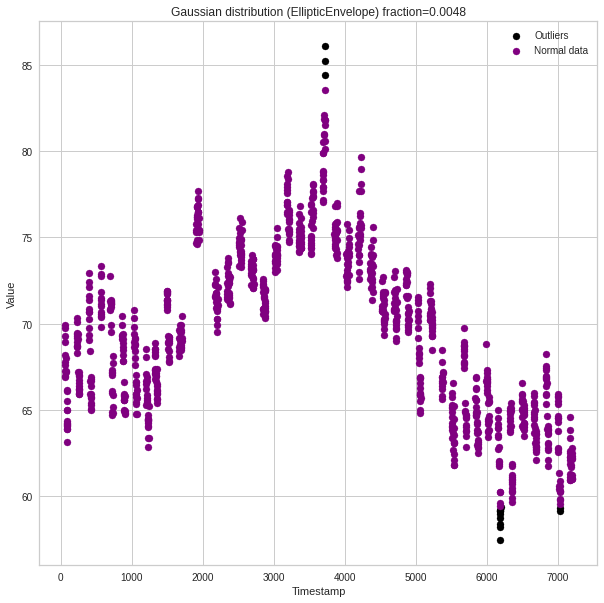

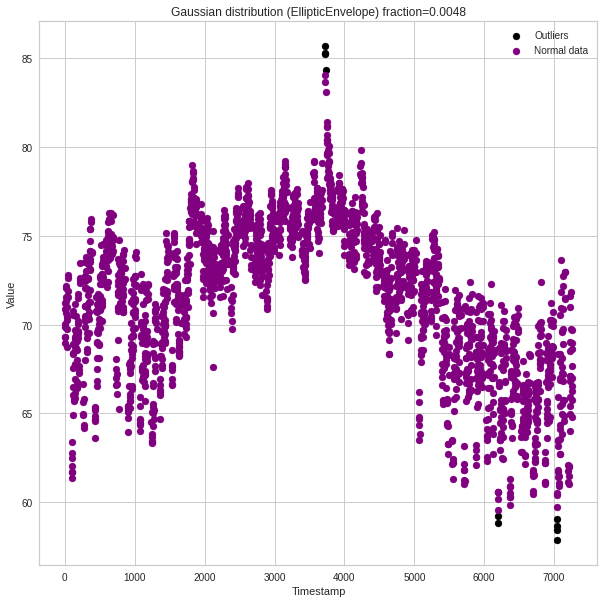

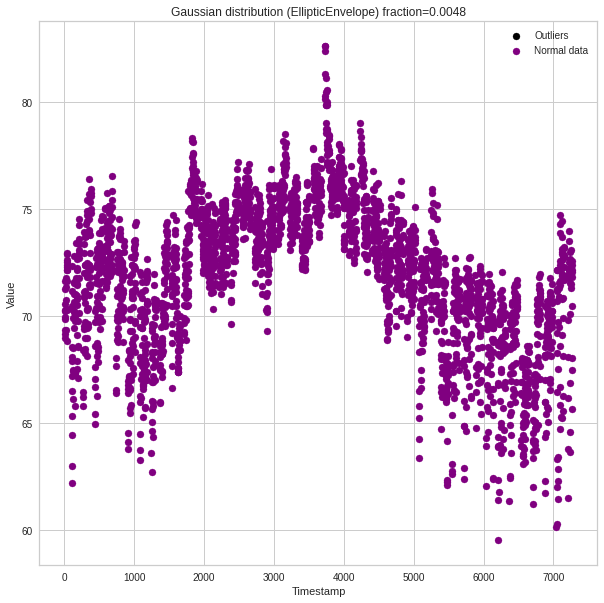

In [ ]:
for i in range(0,4):

    plt.figure(figsize=(10,10))
    plt.scatter(df1[(df1['dtcat'] == i) & (outq  == -1)].index, df1[(df1['dtcat'] == i) & (outq  == -1)]['value'], c = 'black', label = 'Outliers')
    plt.scatter(df1[(df1['dtcat'] == i) & (outq  == 1)].index, df1[(df1['dtcat'] == i) & (outq == 1)]['value'], c = 'purple', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Gaussian distribution (EllipticEnvelope) fraction=0.0048')
    plt.legend()
    plt.show()

# Isolation Forest  FRACTION=0.0048

In [ ]:
from sklearn.ensemble import IsolationForest

forestq = IsolationForest(contamination=0.0048)
forq= forestq.fit_predict(df1[['value']])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pd.DataFrame(forq).value_counts()

 1    7232
-1      35
dtype: int64

In [ ]:
df1['forest_score1']=forestq.decision_function(df1[['value']])

df1['outlier3']=forestq.predict(df1[['value']])
df1

,timestamp,value,year,month,day,day_of_week,day_name,time,hour,WeekDay,dtcat,elpenv_score,outlier1,forest_score,outlier,elpenv_score1,outlier2,forest_score1,outlier3
0,2013-07-04 00:00:00,69.880835,2013,7,0,3,Thursday,00:00:00,0,1,2,9.571927,1,0.266138,1,11.361329,1,0.272233,1
1,2013-07-04 01:00:00,71.220227,2013,7,0,3,Thursday,01:00:00,1,1,2,9.814768,1,0.292610,1,11.604170,1,0.278446,1
2,2013-07-04 02:00:00,70.877805,2013,7,0,3,Thursday,02:00:00,2,1,2,9.778707,1,0.288468,1,11.568109,1,0.278192,1
3,2013-07-04 03:00:00,68.959400,2013,7,0,3,Thursday,03:00:00,3,1,2,9.246070,1,0.263201,1,11.035472,1,0.264889,1
4,2013-07-04 04:00:00,69.283551,2013,7,0,3,Thursday,04:00:00,4,1,2,9.375461,1,0.256256,1,11.164863,1,0.266559,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014,5,1,2,Wednesday,11:00:00,11,1,3,9.805053,1,0.293851,1,11.594456,1,0.301307,1
7263,2014-05-28 12:00:00,72.172956,2014,5,1,2,Wednesday,12:00:00,12,1,3,9.821045,1,0.295301,1,11.610447,1,0.292906,1
7264,2014-05-28 13:00:00,72.046565,2014,5,1,2,Wednesday,13:00:00,13,1,3,9.828173,1,0.298561,1,11.617575,1,0.288727,1
7265,2014-05-28 14:00:00,71.825226,2014,5,1,2,Wednesday,14:00:00,14,1,3,9.834790,1,0.290309,1,11.624192,1,0.290821,1


In [ ]:
df1.groupby('outlier3').size()

outlier3
-1      35
 1    7232
dtype: int64

In [ ]:
count=len(df1[df1['value']>74.8])
accuracy=100*list(df1['outlier3']).count(-1)/count
print('Accuracy of Isilation Forest for 0.01 is',accuracy)

Accuracy of IF for 0.01 is 2.2194039315155356


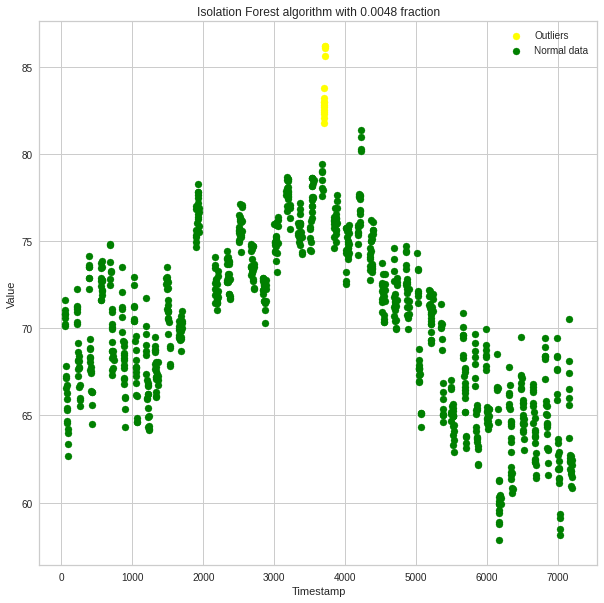

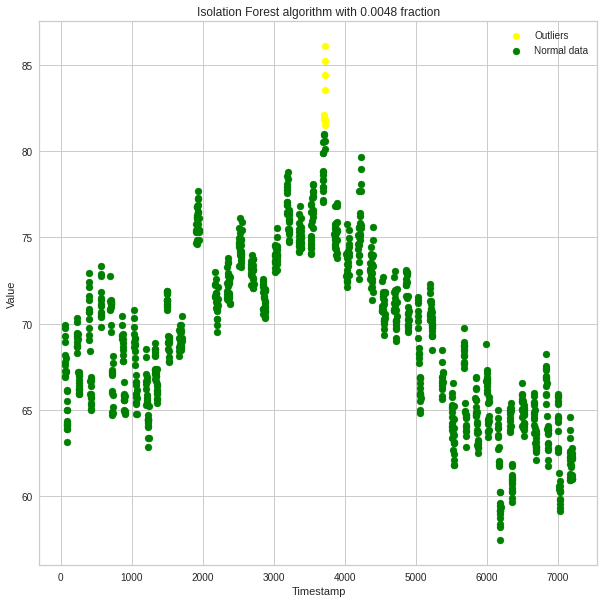

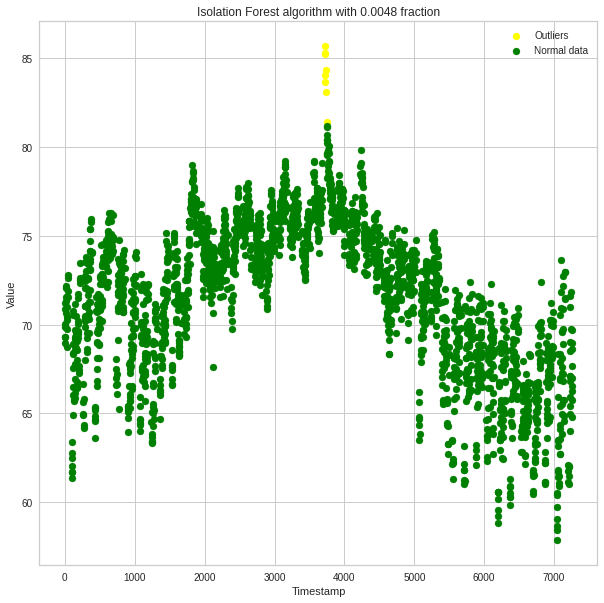

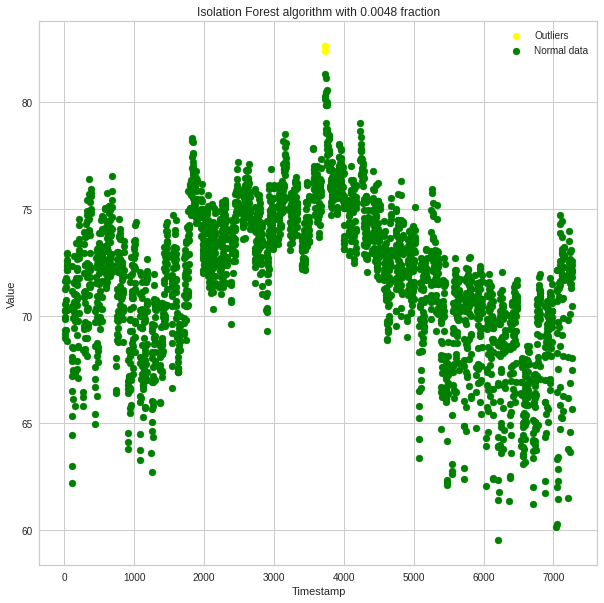

In [ ]:
# Plot
for i in range(0,4):

    plt.figure(figsize=(10,10))
    plt.scatter(df1[(df1['dtcat'] == i) & (forq  == -1)].index, df1[(df1['dtcat'] == i) & (forq  == -1)]['value'], c = 'yellow', label = 'Outliers')
    plt.scatter(df1[(df1['dtcat'] == i) & (forq  == 1)].index, df1[(df1['dtcat'] == i) & (forq  == 1)]['value'], c = 'green', label = 'Normal data')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Isolation Forest algorithm with 0.0048 fraction')
    plt.legend()
    plt.show()